# GT Lab Practical 03 - Strongly Connected Components in Graph

## 1. Definition of connectivity in graph

Given that a graph $G(X,U)$ where $X$ and $U$ be the sets of nodes and edges in graph is shown in figure below:

![Screenshot 2025-11-14 at 3.30.28 in the afternoon.png](<attachment:Screenshot 2025-11-14 at 3.30.28 in the afternoon.png>)
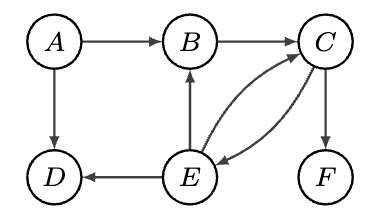

### **Question 1.** Strongly Connected Component

**(1.1).** Applied DFS algorithm to find strongly connected components (SCC) with the previous graph starting from a node of your choice.Your result should be an order list of sets where each set contain the vertices in SCC.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
G = nx.DiGraph(directed=True)

X = ['A', 'B', 'C', 'D', 'E', 'F']
U = [['A', 'B'], ['A', 'D'], ['B', 'C'], ['C', 'F'], ['C', 'E'], ['E', 'C'], ['E', 'B'], ['E', 'D']]

pos = {
    'A':(0, 1),
    'B':(1, 1),
    'C':(2, 1),
    'D':(0, 0),
    'E':(1, 0),
    'F':(2, 0)
}

G.add_nodes_from(X)
G.add_edges_from(U)

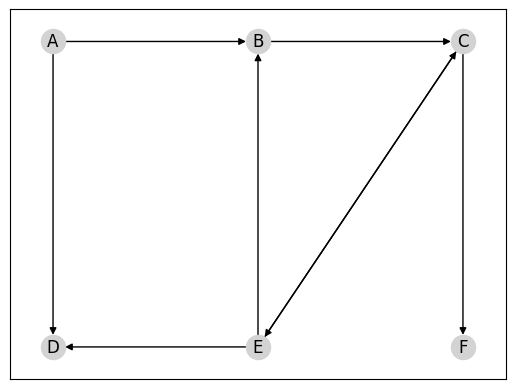

In [7]:
nx.draw_networkx_nodes(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

In [8]:
scc_list = list(nx.strongly_connected_components(G))
for idx, scc in enumerate(scc_list, 1):
    print(f"SCC {idx}: {scc}")

SCC 1: {'F'}
SCC 2: {'D'}
SCC 3: {'E', 'B', 'C'}
SCC 4: {'A'}


**(1.2).** For each SCC list in (1.1), determine which are sink components, which are source components, and which are belong to neither category.

In [9]:
sinkc = []
sourcec = []
neither = []

for scc in scc_list:
    out_edges = set()
    in_edges = set()
    for node in scc:
        out_edges.update([v for u, v in G.out_edges(node) if v not in scc]) # Outgoing edges to nodes outside SCC
        in_edges.update([u for u, v in G.in_edges(node) if u not in scc]) # Incoming edges from nodes outside SCC
    if not out_edges and in_edges:
        sinkc.append(scc)
    elif not in_edges and out_edges:
        sourcec.append(scc)
    elif not out_edges and not in_edges: # Isolated SCC
        sourcec.append(scc)
        sinkc.append(scc)
    else:
        neither.append(scc)

In [11]:
print("Sink Components: ", sinkc)
print("Source Components: ", sourcec)
print("Neither: ", neither)

Sink Components:  [{'F'}, {'D'}]
Source Components:  [{'A'}]
Neither:  [{'E', 'B', 'C'}]


**(1.3).** Determine the minimum number of of edges that must be added to make the graph strongly connected (i.e. the graph has only one SCC).Justify your answer by providing the edges required.

In [15]:
# To make the graph strongly connected, we need to connect all SCCs so that there is a path between any pair of nodes.
# The minimum number of edges required is max(number of source components, number of sink components).
# The edges_to_add variable already contains the required edges.

print(f"Minimum number of edges to add: {max(len(sourcec), len(sinkc))}")

edges_to_add = [['F', 'A'], ['D', 'C']]
print("Edges to add to make the graph strongly connected:", edges_to_add)

Minimum number of edges to add: 2
Edges to add to make the graph strongly connected: [['F', 'A'], ['D', 'C']]


**(1.4).** Write and execute Python code for connected components on the graph G to be verify your result.

In [17]:
# Convert directed graph G to undirected for connected components analysis
G_undirected = G.to_undirected()

# Find connected components
cc_list = list(nx.connected_components(G_undirected))

for i, cc in enumerate(cc_list, 1):
    print(f"Connected Component {i}: {cc}")

Connected Component 1: {'B', 'F', 'C', 'D', 'E', 'A'}


### **Question 2.** Find connected components $(CC)$ by remove the direction and edges $[(E, C), (C, E), (B, C)]$ in graph $G$.

**(2.1).** Run the connected components and DFS algorithm with the previous graph starting from a node of your choice. List the order of each node in sets of connected components (CC). How many CC for graph G ?

**(2.2).** Determine the minimum number of of edges that must be added to make G is connected graph.


**(2.3).** Write and execute python code for connected components algorithms on the graph G. Present the code and the output, demonstrating the traversal from a selected starting node.